In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [2]:
filename="sp500sub.csv"
df=pd.read_csv(filename,index_col="Date",parse_dates=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [3]:
print(f"index type {df.index.dtype}")
print(f"index frequency {df.index.freq}")

index type datetime64[ns]
index frequency None


<AxesSubplot: xlabel='Date'>

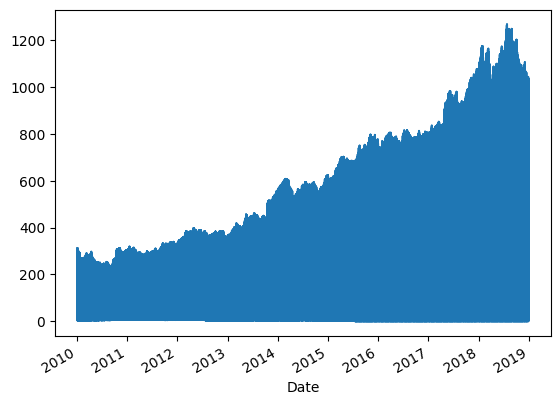

In [4]:
df["Close"].plot()

In [5]:
print(f"first element of index : {df.index[0]}, last element of index : {df.index[-1]}")

first element of index : 2010-01-04 00:00:00, last element of index : 2018-12-28 00:00:00


In [6]:
from pandas import date_range

ms_points = date_range(start="2010-01-04", end="2018-12-04", freq="MS")
print(f"month start points length : {len(ms_points)}")
print(f"first few elements of ms_points : {ms_points[:3]}, last few points {ms_points[-3:]}")

month start points length : 107
first few elements of ms_points : DatetimeIndex(['2010-02-01', '2010-03-01', '2010-04-01'], dtype='datetime64[ns]', freq='MS'), last few points DatetimeIndex(['2018-10-01', '2018-11-01', '2018-12-01'], dtype='datetime64[ns]', freq='MS')


<AxesSubplot: xlabel='Date'>

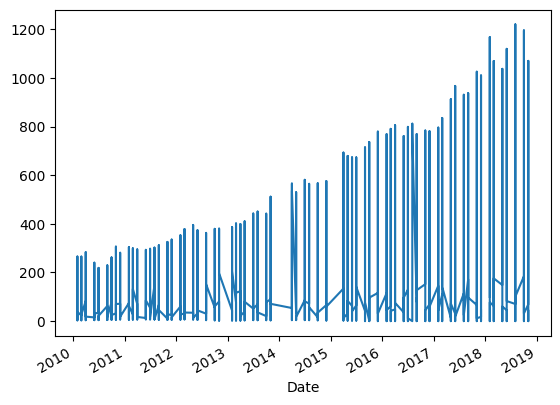

In [7]:
df.loc[df.index.map(lambda thedate : thedate in ms_points),"Close"].plot()

In [8]:
df.loc[df.index.map(lambda thedate : thedate in ms_points),"Close"]

Date
2010-02-01    10.630000
2010-03-01    11.500000
2010-04-01    14.300000
2010-06-01    12.650000
2010-07-01    10.560000
                ...    
2018-05-01    38.990002
2018-06-01    39.560001
2018-08-01    42.830002
2018-10-01    42.830002
2018-11-01    42.369999
Name: Close, Length: 6945, dtype: float64

In [9]:
annual_points = date_range(start="2010-01-01",end="2018-01-01",freq="YS")

In [10]:
annual_points

DatetimeIndex(['2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
               '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
               '2018-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [11]:
annual_points_idx = df.index.map(lambda thedate : thedate in annual_points)
annual_df=df.loc[annual_points_idx]
print(f"annual_df length : {len(annual_df)}")

annual_df length : 1


In [13]:
df.index.dtype

dtype('<M8[ns]')